## Introduction

## About Dataset

The dataset contains 1338 rows of insured data, where the insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Children, Smoker, and Region. The attributes are a mix of numeric and categorical variables. 

Columns: 
•	age: Age of primary beneficiary 

•	sex: Gender of the customer female, male 

•	BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,           objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. 

•	children: Number of children 

•	smoker: Smoking status

•	region: The beneficiary's residential area.

•	charges: Individual medical costs billed by health insurance. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
##reading the data
df = pd.read_csv('insurance 2.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
##average bmi
df['bmi'].mean().round(2)

30.66

In [10]:
##average age
df['age'].mean().round(0)


39.0

In [11]:
##average charge
df['charges'].sum().round(2)

17755824.99

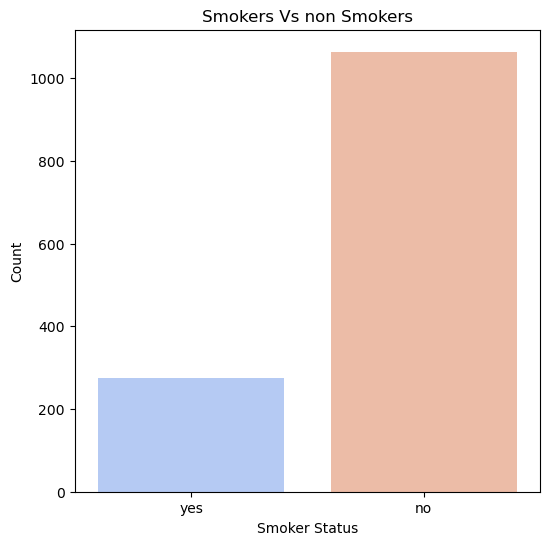

In [12]:
##finding the distribution of smokers and non smokers

df['smoker'].value_counts()
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=df, palette='coolwarm')
plt.title('Smokers Vs non Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.show()



most policy holders are non smokers


C:\Users\Nana Ekua\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

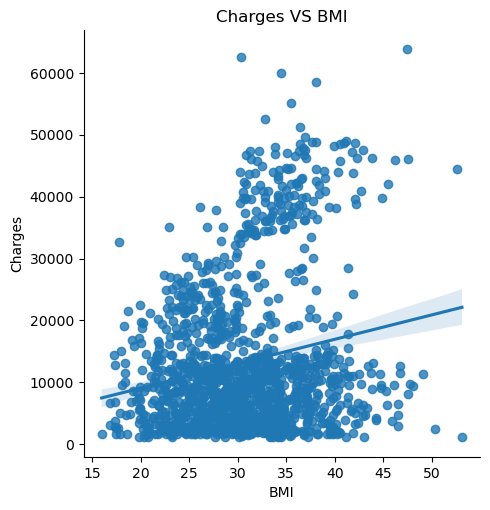

In [13]:
## EFFECT OF BMI AND CHARGES
plt.figure(figsize=(6, 6))
sns.lmplot(x='bmi', y='charges',data=df)
plt.title('Charges VS BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


The higher the BMI, the higher the charges

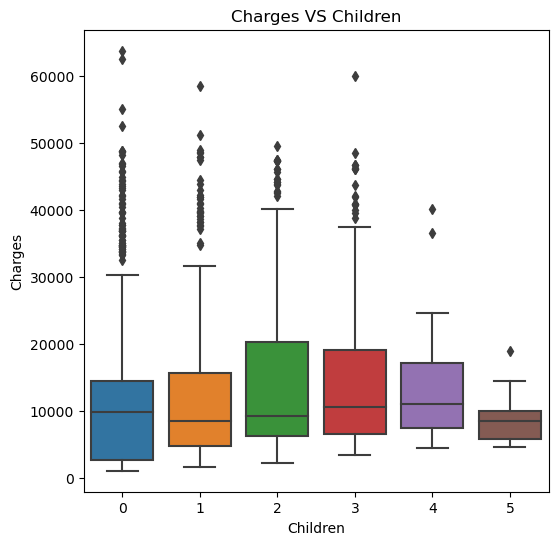

In [14]:
## charges vs children
plt.figure(figsize=(6, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Charges VS Children')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()


In [15]:
average_charges_per_children = df.groupby('children')['charges'].median()
average_charges_per_children 

children
0     9856.95190
1     8483.87015
2     9264.97915
3    10600.54830
4    11033.66170
5     8589.56505
Name: charges, dtype: float64

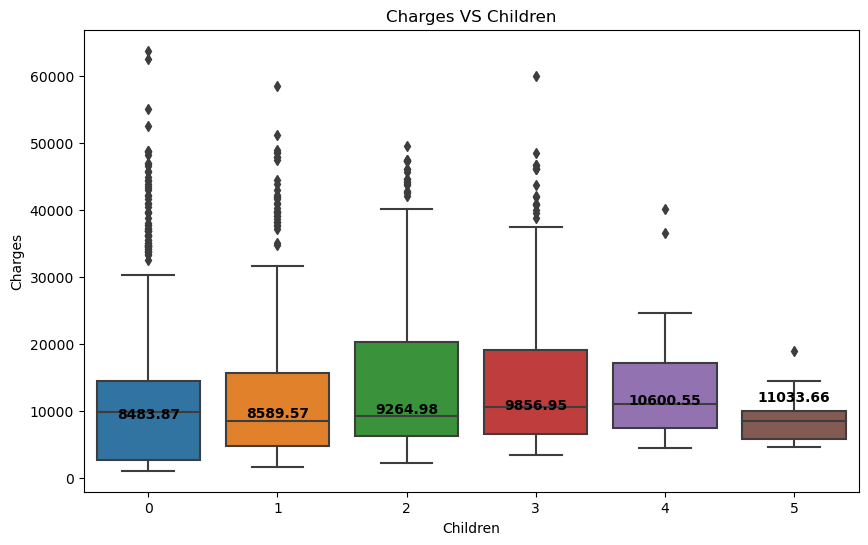

In [16]:

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(x='children', y='charges', data=df)

# Add data labels
medians = df.groupby('children')['charges'].median()
medians = medians.sort_values()

for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', fontdict={'size': 10, 'weight': 'bold'})

# Customize the plot
plt.title('Charges VS Children')
plt.xlabel('Children')
plt.ylabel('Charges')

# Show the plot
plt.show()


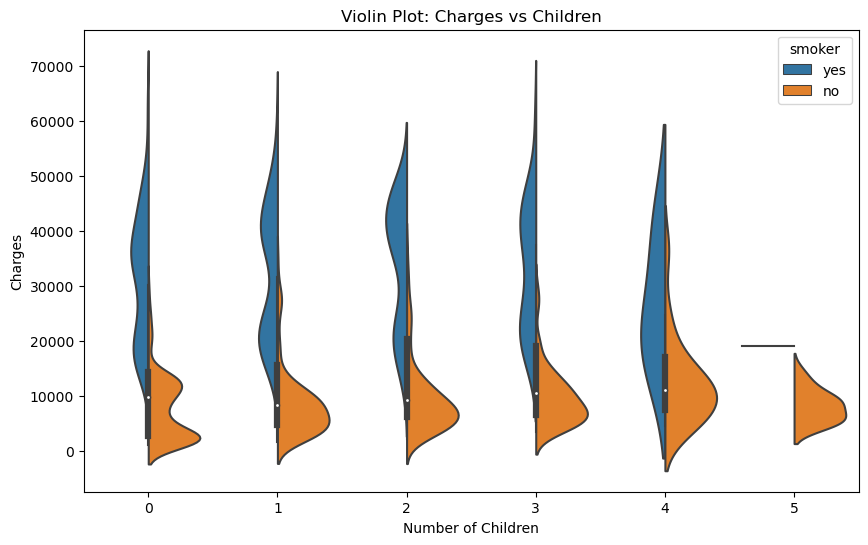

In [17]:


plt.figure(figsize=(10, 6))
sns.violinplot(x='children', y='charges', data=df, hue='smoker', split=True)
plt.title('Violin Plot: Charges vs Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


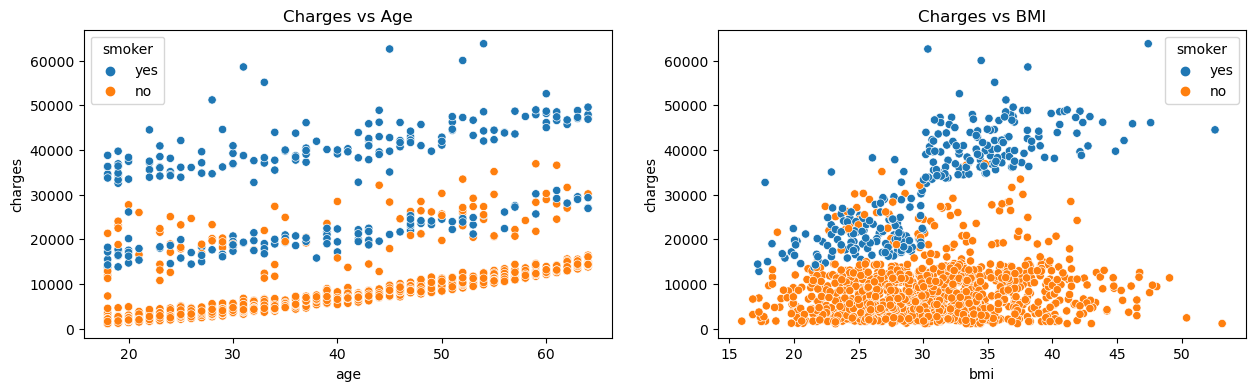

In [18]:


figure, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', ax=axs[0])
axs[0].set_title('Charges vs Age')



sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', ax=axs[1])
axs[1].set_title('Charges vs BMI')
plt.show()



In [19]:
categorical_columns=['sex','smoker', 'region']
df_encode=pd.get_dummies(data=df,prefix='New',prefix_sep=' ', columns=categorical_columns, drop_first=True, dtype='int8')
df_encode

,age,bmi,children,charges,New male,New yes,New northwest,New southeast,New southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [20]:
# define features and target:
x = df_encode.drop("charges", axis=1) # Feature
y = df_encode["charges"]  # Target


In [21]:
# splitting the data to train set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 23)

In [22]:
x_train.shape

(1070, 8)

In [23]:
x_test.shape

(268, 8)

In [24]:
# create the model:
model = LinearRegression()

# fit the model to the training data:
model.fit(x_train, y_train)

# make predictions for the test set:
y_pred = model.predict(x_test)

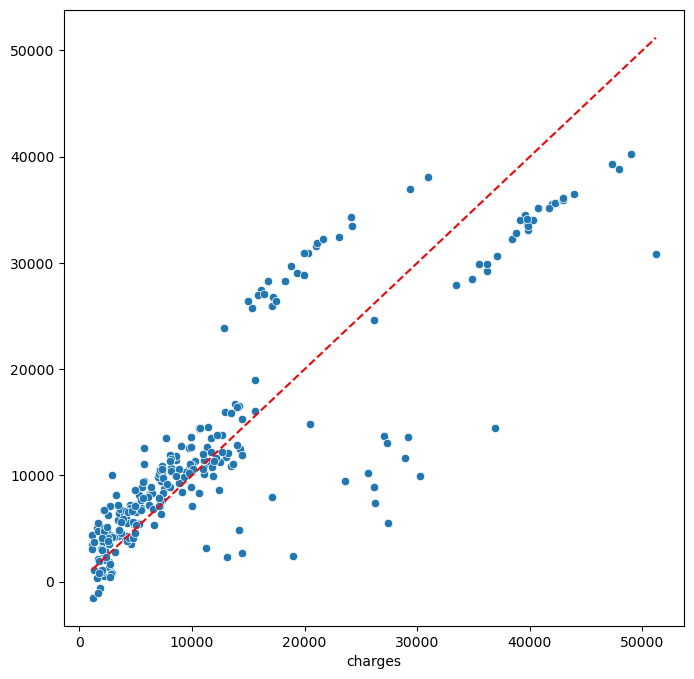

In [25]:
# visualize it
plt.figure(figsize= (8,8))
sns.scatterplot(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color = "red")

In [26]:
df_encode.columns

Index(['age', 'bmi', 'children', 'charges', 'New male', 'New yes',
       'New northwest', 'New southeast', 'New southwest'],
      dtype='object')

In [27]:
# use the model for making new predictions:
new_data = pd.DataFrame({"age": [25], "bmi": [20],"children": [3],'New male': [1], 'New yes': [0],
       'New northwest': [1], 'New southeast':[0], 'New southwest': [0]})

prediction = model.predict(new_data)
print(f"The predicted charges for this new person is : {prediction[0]}")

The predicted charges for this new person is : 2505.713842924926


In [28]:
##evaluate the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae




3991.203793513658

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error is {mse}')

Mean Squared Error is 34652052.87940845


In [31]:
rmse =np.sqrt(mse)
print(" Root Mean Squared Error:", rmse)

 Root Mean Squared Error: 5886.599432559383


In [33]:


# Ensure that target values are non-negative
y_test_non_negative = np.maximum(y_test, 0)
y_pred_non_negative = np.maximum(y_pred, 0)

# Calculate MSLE and RMSLE
msle = mean_squared_log_error(y_test_non_negative, y_pred_non_negative)
rmsle = np.sqrt(msle)

print(f'Root Mean Squared Logarithmic Error is {rmsle}')


Root Mean Squared Logarithmic Error is 0.9430428635084238


In [34]:
##R squared (R2) tells the perfomance of the model
from sklearn.metrics import r2_score
r2 =r2_score(y_test,y_pred)
print(r2)

0.7536440382001556


In [36]:
#calculate Adjusted R2
n=len(df)
k=x.shape [1]
adjusted_r_squared = 1-((1-r2)*(n-1)/(n-k-1))
print(f'Adjusted r2 is {adjusted_r_squared}')

Adjusted r2 is 0.7521610828243852
